# 1. 데이터 가져오기

* 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
* 여기에서 데이터를 상세히 확인할 수 있습니다.

In [1]:
import pandas as pd

train = pd.read_csv('./data/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 2. `datetime` 컬럼을 `datetime` 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

* `to_datetime` 활용 : 링크 참조
* pandas datetime extract year month day 키워드로 검색해 보기

In [2]:
import datetime

train['datetime']= pd.to_datetime(train['datetime'])
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


# 3. `year`, `month`, `day`, `hour`, `minute`, `second` 데이터 개수 시각화하기

* `sns.countplot` 활용해서 시각화하기
* `subplot`을 활용해서 한 번에 6개의 그래프 함께 시각화하기

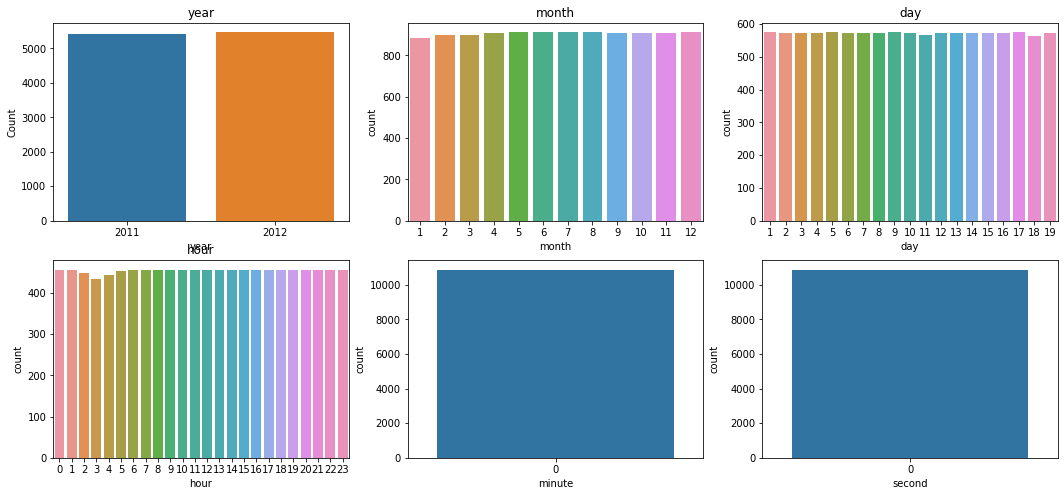

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.countplot(x='year', data=train, ax=ax1)
sns.countplot(x='month', data=train,  ax=ax2)
sns.countplot(x='day', data=train,   ax=ax3)
sns.countplot(x='hour', data=train ,  ax=ax4)
sns.countplot(x='minute', data=train, ax=ax5)
sns.countplot(x='second', data=train, ax=ax6)

ax1.set(ylabel='Count',title="year")
ax2.set(xlabel='month',title="month")
ax3.set(xlabel='day', title="day")
ax4.set(xlabel='hour', title="hour")

plt.show() 

# 4. X, y 컬럼 선택 및 train/test 데이터 분리

* `X`(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
* `count`값을 맞추고자 하므로, `y`변수에 `count`컬럼의 데이터 넣기

In [11]:
X = train[[
    'season', 'holiday', 'workingday', 'weather', 
    'temp', 'atemp', 'humidity', 'windspeed', 'year',
    'month', 'day', 'hour', 'minute' ,'second']].values

y = train['count'].values

X.shape, y.shape

((10886, 14), (10886,))

# 5. LinearRegression 모델 학습

* `sklearn`의 `LinearRegression`모델 불러오기 및 학습하기

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8708, 14) (2178, 14)
(8708,) (2178,)


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

* 학습된 모델에 `X_test`를 입력해서 예측값 출력하기
* 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
* mse 값과 함께 rmse 값도 계산하기

In [14]:
predictions = model.predict(X_test)
predictions

array([248.10627003,  48.79765547, 200.90676727, ..., 309.7528022 ,
        38.17030198, 243.62697388])

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'mse: {mse}')
print(f'rmse: {rmse}')

mse: 19945.370053754086
rmse: 141.22807813517142


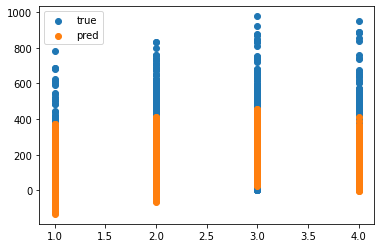

In [16]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

# 7. x축은 `temp` 또는 `humidity`로, y축은 `count`로 예측 결과 시각화하기

* x축에 X 데이터 중 `temp`데이터를, y축에는 count 데이터를 넣어서 시각화하기
* x축에 X 데이터 중 `humidity`데이터를, y축에는 count 데이터를 넣어서 시각화하기

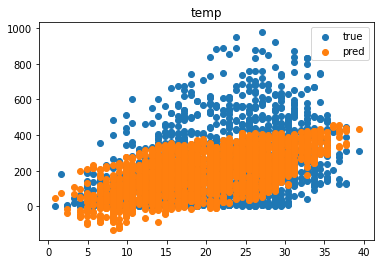

In [17]:
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.title('temp')
plt.legend()
plt.show()

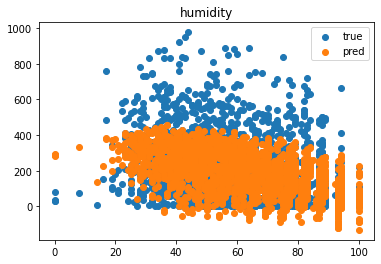

In [18]:
plt.scatter(X_test[:, 6], y_test, label="true")
plt.scatter(X_test[:, 6], predictions, label="pred")
plt.title('humidity')
plt.legend()
plt.show()